# Do Extreme Temperatures Correlate with Yearly Increase In CO2?

For my project I decided to look at whether or not increased levels in CO2 were predictive of extreme weather events such as extreme high temperatures, drought, and hurricanes.  I recieved my raw Data from the Climate Index on the National Oceanic and Atmospheric Administration website.  On the NOAA website, there is the ability to select an area in the United States. I chose to model this project on data collected in the Southeastern region of the United States,(my hometown!) during hurricane season: June- November.  


## Process/ Changes to R-Squared Values and Accuracy 

One of the first things I needed to do with this data set was change the numbers from percentages to numerals. 

I did this by using Panda to find this command: str.replace('%', '')

Once I was able to change the numbers from percents, I ran my first linear regression using feature 1: Step 1 (Extremes in Maximum Temperatures) column and feature 2: Year (1910-2016) column. When I ran the code, it worked, this just gave me some pretty unreliable results. 
My R-Squared value represented only 2% of the variation.  For those of you that are not math savvy like I am, R-Squared is essentially how much of the "up and down" the code is portraying in its measurement. Because mine was only measuring 2%, it means it was only portraying a very small percentage of the variation.  Not good.  
Second, I looked to the Accuracy measurement. This did not look good either.  Although it was clear there was a slight increase on the graph, my Accuracy percent was negative.  This is definitly not good because Accuracy measures how many times the graph was right vs. wrong.  Comparing this with an ideal 0.5 value, or 50%,that would have been a pretty good value because it means the graph was right 50% of the time. 

To try and fix these issues, or at least see how it would change my results I ran a second linear regression using a different feature. The second linear regression I measured used the Total Climate Extreme Index (All Steps) and Year (1910-2016) column.  I again changed the percentages using the str.replace('%', '') command.  This gave me slightly better results!  While my R-Squared Value did not improve (its value remained low at 5.3%) my Accuracy value was no longer negative! It measured 12.5%. This proved to be a more accurate measurement. 

The next process I would have carried out would be to find the yearly measurement of CO2(in ppm) and run this linear regression with the Total Climate Extreme Index (All Steps) column. 

In [2]:
import os
try:
    inputFunc = raw_input
except NameError:
    inputFunc = input

import pandas as pd
from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessDay
import numpy as np
 
import seaborn as sns
from statsmodels.formula.api import ols

from sklearn import linear_model
from sklearn import metrics

from sklearn.linear_model import LogisticRegression
from patsy import dmatrices

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt

import random



# Custom functions

def evaluate(pred, labels_test):
    acc = accuracy_score(pred, labels_test)
    print ("Accuracey: %s"%acc)
    tn, fp, fn, tp = confusion_matrix(labels_test, pred).ravel()

    recall = tp / (tp + fp)
    percision = tp / (tp + fn)
    f1 = (2 / ((1/recall)+(1/percision)))

    print ("")
    print ("True Negatives: %s"%tn)
    print ("False Positives: %s"%fp)
    print ("False Negatives: %s"%fn)
    print ("True Positives: %s"%tp)
    print ("Recall: %s"%recall)
    print ("Precision: %s"%percision)
    print ("F1 Score: %s"%f1)

def plot_bound(Z_val,data,col1,col2,binary):
    # Z-val equals "Yes" value. E.g., "Y" or "1". 
    # data equals df
    # col1 and col2 defines which colums to use from data
    # Plot binary decision boundary. 
    # For this, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    
    x_min = float(data.iloc[:,[col1]].min())-float(data.iloc[:,[col1]].min())*0.10 
    x_max = float(data.iloc[:,[col1]].max()+float(data.iloc[:,[col1]].min())*0.10)
    y_min = 0.0; 
    y_max = float(training.iloc[:,[col2]].max())+float(training.iloc[:,[col2]].max())*0.10
    h_x = (x_max-x_min)/100  # step size in the mesh
    h_y = (y_max-y_min)/100  # step size in the mesh
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h_x), np.arange(y_min, y_max, h_y))
    if binary == 1:
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])   
        Z = np.where(Z=="Y",1,0)
    else:
        Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.pcolormesh(xx, yy, Z)
    plt.show()

## Data Cleaning

Here we load the data we collected and get it all ready to feed to our statistical model(s). That is, we are trying to make a table with one **target** column and one or more **features**. Here I'm loading happiness.csv from: https://data.somervillema.gov/Happiness/Somerville-Happiness-Survey-responses-2011-2013-20/w898-3dfm Note: you can find information on the data elements at this link. 


In [25]:
# Load and peek at your data. Change the file name as needed. 
raw_data_df = pd.read_csv('Project3CSV.csv') 
#raw_data_df = raw_data_df.apply(pd.to_numeric, errors='coerce')
raw_data_df["Step 1 (Extremes in Maximum Temperatures)"] = raw_data_df["Step 1 (Extremes in Maximum Temperatures)"].str.replace('%', '')
raw_data_df.head()
raw_data_df["Total Climate Extreme Index (All Steps)"] = raw_data_df["Total Climate Extreme Index (All Steps)"].str.replace('%', '')
raw_data_df.head()

,Hurricane Season Year (June - November),Step 1 (Extremes in Maximum Temperatures),Step 2 (Extremes In Minimum Temperature),Step 3 (Extremes in Drought Severity (PDSI),Total Climate Extreme Index (All Steps)
0,1910,24.80,12.10%,0.00%,10.20
1,1911,7.00,15.00%,10.40%,13.22
2,1912,10.40,0.50%,37.00%,18.56
3,1913,10.00,38.30%,0.00%,12.56
4,1914,2.70,3.90%,28.60%,16.42


In [26]:
processed_data_df = raw_data_df.rename(columns={
                                                "Hurricane Season Year (June - November)": "year",
                                                "Total Climate Extreme Index (All Steps)": "total"
                                                })
processed_data_df.head()

,year,Step 1 (Extremes in Maximum Temperatures),Step 2 (Extremes In Minimum Temperature),Step 3 (Extremes in Drought Severity (PDSI),total
0,1910,24.80,12.10%,0.00%,10.20
1,1911,7.00,15.00%,10.40%,13.22
2,1912,10.40,0.50%,37.00%,18.56
3,1913,10.00,38.30%,0.00%,12.56
4,1914,2.70,3.90%,28.60%,16.42


In [27]:
# I'm now going to make a set of tables to be used in training some models
# The first set will be for linear regressions where the traget is numeric.
# Happiness
data_df = processed_data_df[[
                               'year', 
                               'total'
                        ]].copy()

data_df = data_df.apply(pd.to_numeric, errors='coerce')


data_df.head()

,year,total
0,1910,10.20
1,1911,13.22
2,1912,18.56
3,1913,12.56
4,1914,16.42


In [28]:
data = data_df
holdout = data.sample(frac=0.2)
training = data.loc[~data.index.isin(holdout.index)]

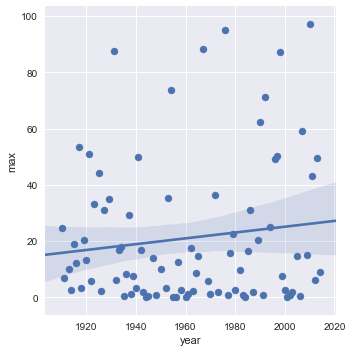

In [22]:
sns.lmplot(x="year", y="total", data=training, x_estimator=np.mean, order=1)

In [30]:
model = ols("total ~ year", training).fit()
#model = ols("happy ~ age + income + np.power(age, 2) + np.power(income, 2)", training).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  total   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                  0.042
Method:                 Least Squares   F-statistic:                     4.712
Date:                Mon, 04 Dec 2017   Prob (F-statistic):             0.0328
Time:                        13:05:01   Log-Likelihood:                -318.90
No. Observations:                  86   AIC:                             641.8
Df Residuals:                      84   BIC:                             646.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -129.1839     68.476     -1.887      0.063    -265.355       6.988
year           0.0758      0.035      2.171      0.033       0.006       0.145
==============================================================================
Omnibus:                       11.726   Durbin-Watson:                   2.071
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               12.239
Skew:                           0.892   Prob(JB):                      0.00220
Kurtosis:                       3.480   Cond. No.                     1.25e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.25e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [29]:
# Rerun with SciKitLearn because it's easy to check accuracy
features_train = training.drop("total", axis=1).as_matrix(columns=None)
labels_train = training["total"].as_matrix(columns=None)

features_test = holdout.drop("total", axis=1).as_matrix(columns=None)
labels_test = holdout["total"].as_matrix(columns=None)

lm = linear_model.LinearRegression()
clf = lm.fit(features_train, labels_train)
pred = clf.predict(features_test)
accuracy = metrics.r2_score(labels_test, pred)
print("R squared:",lm.score(features_train,labels_train))
print("Accuracy:",accuracy)

R squared: 0.05311520529
Accuracy: 0.12527286178


In [2]:
# Load and peek at your data. Change the file name as needed. 
raw_data_df = pd.read_csv(Project3CSV(2).xlsx) 
#raw_data_df = raw_data_df.apply(pd.to_numeric, errors='coerce')
raw_data_df["Maximum Extremes"] = raw_data_df["Maximum Extremes"].str.replace('%', '')
raw_data_df.head()
raw_data_df["PPM of CO2"] = raw_data_df["PPM of CO2"].str.replace('%', '')
raw_data_df.head()

NameError: name 'pd' is not defined